# Basis function test

In [159]:
import autograd.numpy as np
import autograd.numpy.random as npr
from autograd import jacobian

from basis import Basis
from gym.spaces import Box

from utils import convert_traj2ck

In [182]:
explr_space = Box(np.array([0., 0.]), np.array([1.0, 1.0]), dtype=np.float32)
basis = Basis(explr_space=explr_space, num_basis=5)

xt = [explr_space.sample() for _ in range(10)]

In [183]:
basis.k

array([[0, 0],
       [1, 0],
       [2, 0],
       [3, 0],
       [4, 0],
       [0, 1],
       [1, 1],
       [2, 1],
       [3, 1],
       [4, 1],
       [0, 2],
       [1, 2],
       [2, 2],
       [3, 2],
       [4, 2],
       [0, 3],
       [1, 3],
       [2, 3],
       [3, 3],
       [4, 3],
       [0, 4],
       [1, 4],
       [2, 4],
       [3, 4],
       [4, 4]])

In [184]:
basis.fk(xt[0])

array([ 1.        ,  0.2917829 , -0.82972548, -0.77598231,  0.37688875,
        0.22786398,  0.26594725, -0.75625821, -0.70727367,  0.34351748,
       -0.89615601, -1.04593199,  2.97425391,  2.78160485, -1.35100446,
       -0.63626734, -0.74260771,  2.11170888,  1.97492878, -0.95920799,
        0.6061912 ,  0.7075049 , -2.01188912, -1.88157457,  0.91386656])

In [185]:
basis.dfk(xt[0])

array([[  0.        ,   0.        ],
       [ -3.00488483,   0.        ],
       [ -3.507097  ,  -0.        ],
       [  5.94472085,  -0.        ],
       [ 11.63970965,   0.        ],
       [  0.        ,  -3.05894664],
       [ -0.68470524,  -0.89254857],
       [ -0.79914134,   2.53808568],
       [  1.35458819,   2.37368897],
       [  2.65227141,  -1.1528816 ],
       [ -0.        ,  -2.78809591],
       [  2.69284541,  -0.81351893],
       [  3.14290584,   2.31335396],
       [ -5.32739695,   2.16351356],
       [-10.43099502,  -1.05080109],
       [ -0.        ,   7.27091941],
       [  1.91191057,   2.12153053],
       [  2.23145186,  -6.03286641],
       [ -3.7824327 ,  -5.64210601],
       [ -7.40596901,   2.7403254 ],
       [  0.        ,   9.99427493],
       [ -1.82153403,   2.91615932],
       [ -2.12597051,  -8.29250362],
       [  3.60363606,  -7.75538216],
       [  7.05588679,   3.76672659]])

In [191]:
k = basis.k[6]


In [195]:
np.prod(basis.dl * (2.0 * k * np.pi + np.sin(2.0 * k *np.pi)))

39.47841760435743

In [193]:
(16 * np.prod(k)*np.pi**2)

157.91367041742973

In [178]:
basis.hk

array([1.  , 1.  , 1.  , 1.  , 1.  , 0.25, 0.25, 0.25, 1.  , 0.25, 0.25,
       0.25, 1.  , 0.25, 0.25, 0.25])

## This is how you would compute the cks

In [6]:
convert_traj2ck(basis, xt)

array([ 1.        , -0.19621146, -0.07993507,  0.02621144, -0.12668829,
        0.23798779, -0.16839487,  0.05275571, -0.40835119, -0.03744722,
        0.19696911, -0.15653757,  0.03462798, -0.16466172,  0.06769202,
        0.10483742])

# Barrier Function Test

In [7]:
import autograd.numpy as np
from barrier import Barrier
from gym.spaces import Box

In [8]:
explr_space = Box(np.array([0., 0.]), np.array([1.0, 1.0]), dtype=np.float32)
barrier = Barrier(explr_space)

In [9]:
barrier.cost(explr_space.sample()-1)

11.801507472991943

In [10]:
barrier.dx(explr_space.sample()-1)

array([-4.58900124, -0.21006126])

# Target Distribution test

In [1]:
from target_dist import TargetDist
from utils import convert_phi2phik, convert_phik2phi

# import again for independence between cells
import autograd.numpy as np
from basis import Basis
from gym.spaces import Box

import matplotlib.pyplot as plt

In [2]:
t_dist = TargetDist(num_nodes=5)

In [3]:
xy, vals = t_dist.get_grid_spec()

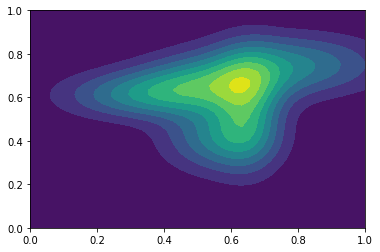

In [4]:
plt.contourf(*xy, vals, levels=10)

## Checking to see if the phiks can be computed from the phik class template

In [5]:
explr_space = Box(np.array([0., 0.]), np.array([1.0, 1.0]), dtype=np.float32)
basis = Basis(explr_space=explr_space, num_basis=10)

phik = convert_phi2phik(basis, t_dist.grid_vals, t_dist.grid)
print(phik)

[ 1.00000000e+00 -2.03839874e-01 -4.20205593e-01  2.14683213e-01
  2.85941231e-03 -1.01807255e-01  6.58790606e-02 -9.52592805e-04
 -3.61786095e-02  2.56214253e-02 -2.96586266e-01  8.38673676e-02
  5.94283082e-02 -2.42555501e-02  2.15734711e-02 -1.92047428e-03
 -8.22977372e-03  2.40541511e-03  4.88963290e-03 -3.49090457e-03
 -4.38984795e-01  1.97964205e-02  2.40300507e-01 -8.61924411e-02
 -1.72465997e-02  6.16737887e-02 -3.50802893e-02 -8.64628506e-05
  1.87531740e-02 -1.32903046e-02  3.21102602e-01 -2.31053370e-02
 -8.53137396e-02 -1.37799894e-02 -1.98241392e-02  6.37523119e-03
  7.89949378e-03 -3.87542724e-03 -4.37225763e-03  3.23095910e-03
 -1.02200792e-01  7.48326779e-02 -5.45789106e-03 -1.33343691e-02
  7.71189390e-03 -1.33675067e-02  6.53163669e-03  5.64238307e-05
 -2.30523609e-03  1.74739979e-03 -3.40981988e-02 -7.79601113e-02
  2.69690352e-02  4.83603450e-02  4.05405271e-03 -4.22857962e-03
 -2.58909194e-03  2.31134908e-03  5.56988310e-04 -5.45948665e-04
  8.37165187e-02  1.05636

In [6]:
phi = convert_phik2phi(basis, phik, t_dist.grid)

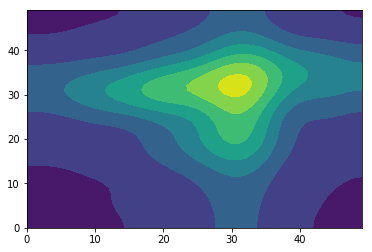

In [7]:
plt.contourf(phi.reshape(50,50))

# Testing the ergodic controller 

In [1]:
from double_integrator import DoubleIntegrator
from ergodic_control import RTErgodicControl
from target_dist import TargetDist
from utils import convert_phi2phik, convert_ck2dist, convert_traj2ck, convert_phik2phi
import autograd.numpy as np

import matplotlib.pyplot as plt

In [18]:
env = DoubleIntegrator()
model = DoubleIntegrator()
t_dist = TargetDist(num_nodes=2)
erg_ctrl = RTErgodicControl(model, t_dist, horizon=15, num_basis=5, batch_size=-1)

Checking to make sure that the phiks are set right

In [20]:
erg_ctrl.phik = convert_phi2phik(erg_ctrl.basis, t_dist.grid_vals, t_dist.grid)
erg_ctrl.phik

array([ 1.        , -0.28804247, -0.39783902,  0.18765139,  0.02114903,
        0.22492516, -0.04239035, -0.12482156,  0.0398578 ,  0.02672229,
       -0.48358964,  0.16478163,  0.15217864, -0.09342011,  0.0147679 ,
       -0.19881432,  0.04289758,  0.10176719, -0.0358003 , -0.01829677,
       -0.03475824, -0.0226718 ,  0.06539434, -0.00309362, -0.03278793])

In [21]:
log = {'trajectory' : []}
state = env.reset()
for t in range(200):
    ctrl = erg_ctrl(state)
    state = env.step(ctrl)
    log['trajectory'].append(state)
print('doneee')

doneee


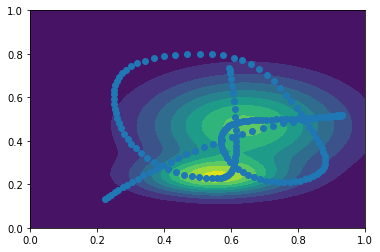

In [22]:
xy, vals = t_dist.get_grid_spec()
plt.contourf(*xy, vals, levels=10)
xt = np.stack(log['trajectory'])

tf = 200
plt.scatter(xt[:tf,0], xt[:tf,1])

Trajectroy statistics are reconstructed

In [23]:
# path = [np.random.normal(0.2, 0.1,size=(2,)) for _ in range(50)] + [np.random.normal(0.7, 0.1,size=(2,))  for _ in range(50)]
path = np.stack(log['trajectory'])[:tf,model.explr_idx]
ck = convert_traj2ck(erg_ctrl.basis, path)
val = convert_ck2dist(erg_ctrl.basis, ck)

--Assuming square grid


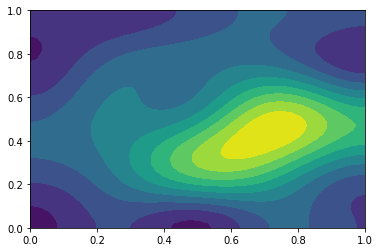

In [24]:
plt.contourf(*xy, val.reshape(50,50), levels=10)

Testing the $\phi_k$ reconstruction

In [25]:
phi = convert_phik2phi(erg_ctrl.basis, erg_ctrl.phik, t_dist.grid)

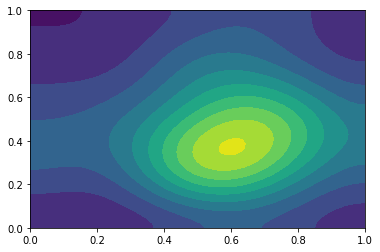

In [26]:
plt.contourf(*xy, phi.reshape(50,50), levels=10)

### In case you want to profile

In [27]:
%timeit erg_ctrl(state)

6.82 ms ± 1.64 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)
